## **Product Sales - EDA**

### Report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
raw_data= pd.read_csv('../data/raw/product_sales.csv')
raw_data.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [3]:
#Descriptive statistics for each column

raw_data.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


Based on the above descriptive summary statistics, we can see that we have inconsistencies in data types and data input.
Below we will continue examining the dataset and all corrections made will be saved under clean_data.

In [4]:
# Create a dataframe to see per sales method and to spot inconsistencies in naming conventions

raw_data['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [5]:
# Fixing sales_method

clean_data = raw_data.copy()

clean_data['sales_method'] = (
    clean_data['sales_method']
        .str.lower()
        .replace('em + call', 'email + call')
)

clean_data.reset_index(drop=True)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [6]:
# clean data info on each column and data type

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
#store in a new dataframe missing revenue rows
missing_revenue= clean_data[clean_data['revenue'].isna()]

#drop from clean_data the empty revenue rows and wait for a response regarding the missing data.
clean_data.dropna(subset=['revenue'], inplace=True)
clean_data.reset_index(drop=True)

# Define the current year and subtract 1984 to get the max reasonable years
current_year = datetime.now().year
norm_founded = current_year - 1984  # e.g., 2025 - 1984 = 41

# Filter rows with unrealistic 'years_as_customer' values
over_founded_years = clean_data[clean_data['years_as_customer'] > norm_founded]

clean_data= clean_data[clean_data['years_as_customer'] <= norm_founded].reset_index(drop=True)
clean_data

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
1,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
2,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
3,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
4,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
...,...,...,...,...,...,...,...,...
13919,4,email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio
13920,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
13921,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
13922,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia


In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13924 entries, 0 to 13923
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 870.4+ KB


[Text(0, 0, '4780'), Text(0, 0, '6921'), Text(0, 0, '2223')]

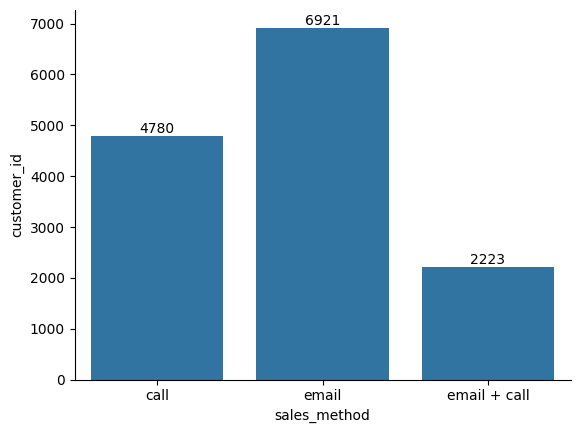

In [9]:
customers_per_method = clean_data.groupby('sales_method', as_index=False).count()

ax = sns.barplot(data=customers_per_method, x='sales_method', y='customer_id')
sns.despine()

# One-liner to add labels
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'Site Visits by Sales Method')

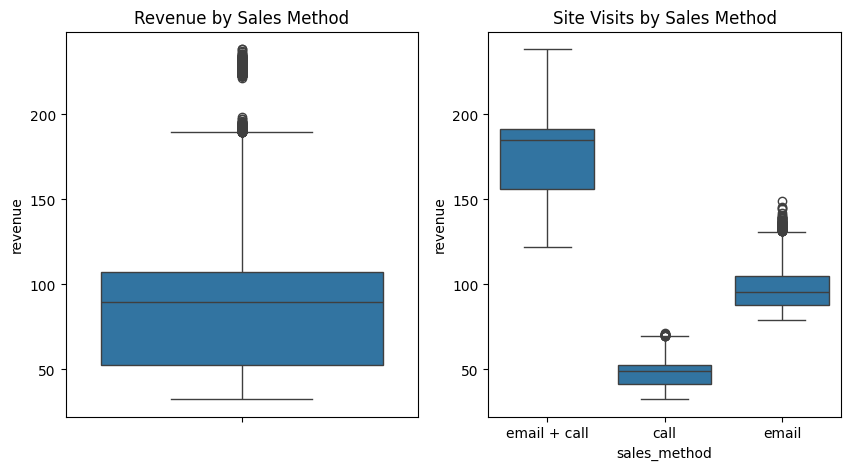

In [10]:
plt.figure(figsize=(10, 5))

# First subplot: revenue
plt.subplot(1, 2, 1)
sns.boxplot(data=clean_data, y='revenue')
plt.title('Revenue by Sales Method')

# Second subplot: revenue by sales_method
plt.subplot(1, 2, 2)
sns.boxplot(data=clean_data, x='sales_method', y='revenue')
plt.title('Site Visits by Sales Method')